In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
fema_claims_xl = pd.ExcelFile("Data\Yearly Paid Claims_FEMA.xlsx")
fema_funding_xl = pd.ExcelFile("Data\Yearly FEMA funding.xlsx")
disasterinci = pd.ExcelFile("Data/FEMA_Disaster incidents.xlsx")
precip_df = pd.read_csv("Data/heavy_precip.csv")
temp_data = pd.read_csv("Temperature Anomolies/Resources/Temperature_fig-1.csv")
disasterdec = pd.ExcelFile("Data/FEMA_Disaster Declarations.xlsx")

In [3]:
#The total number of claims closed with payment for the given year.
#The total dollar amount paid (in billions) on closed claims for the given year.
nfip_pd = fema_claims_xl.parse("NFIP")
nfip_df = nfip_pd.groupby(["Year"]).sum()
nfip_df.reset_index(level=0, inplace=True)
#nfip = nfip_df[(nfip_df["Year"] >= 1996) & (nfip_df["Year"] <= 2015)]
nfip = nfip_df.rename(columns = {'NumberOfClaimsClosedWithPayment':'Number of Claims Closed'})
nfip = nfip.rename(columns = {'TotalPaid':'Total Paid on Closed Claims'})
nfip['Total Paid on Closed Claims'] = nfip['Total Paid on Closed Claims']/1000000000
nfip.head()

,Year,Number of Claims Closed,Total Paid on Closed Claims
0,1996.0,46849.0,0.635417
1,1997.0,27063.0,0.414132
2,1998.0,52074.0,0.706868
3,1999.0,43385.0,0.563194
4,2000.0,14718.0,0.180638


In [4]:
#The number of Flooding Episdoes for the Year.
noaa_df = fema_claims_xl.parse("NOAA")
noaa_pd = noaa_df.groupby(["Year"]).sum()
noaa_pd.pop("Lat")
noaa_pd.pop("Lon")
noaa = noaa_pd.rename(columns = {'NumEpisodes':'Flooding Episodes'})
noaa.reset_index(level=0, inplace=True)
noaa.head()

,Year,Flooding Episodes
0,1996.0,5633
1,1997.0,4658
2,1998.0,5461
3,1999.0,3873
4,2000.0,3536


In [5]:
#FEMA Funding in billions of Real 2010 Dollars
fema_funding = fema_funding_xl.parse("Data Source-CRS Report")
fema_funding

,Year,Administration Request,Enacted Appropriation,Emergency Supplemental,Total Enacted
0,2000,3.521,3.521,0.000,3.521
1,2001,3.584,1.964,0.000,1.964
2,2002,1.660,0.805,0.000,0.805
3,2003,2.185,0.948,1.690,2.638
4,2004,2.258,2.078,2.555,4.633
5,2005,2.402,2.280,48.122,50.402
6,2006,2.315,1.915,6.491,8.406
7,2007,2.042,1.578,4.305,5.883
8,2008,2.035,1.419,11.108,12.527
9,2009,2.043,1.299,0.000,1.299


In [6]:
#Extreme One-Day Precipitation Events:  
#percentage of the land area of the contiguous 48 states where a much greater than normal portion 
#of total annual precipitation has come from extreme single-day precipitation events.
precip = precip_df[(precip_df['Year'] >= 1996) & (precip_df['Year'] <= 2015)]
precip.pop("9-year moving average")
precip.head()

,Year,Index value
86,1996,0.203
87,1997,0.112
88,1998,0.206
89,1999,0.153
90,2000,0.092


In [7]:
#Number of disaster incidents by year
d_incidents = disasterinci.parse("FEMA Declarations")
dis_inci = d_incidents[["Year", "Incident Type"]]
incidents_count = dis_inci.groupby(["Year"]).count()
incidents_count.reset_index(level=0, inplace=True)
incidents_count = incidents_count.rename(columns = {"Incident Type":'Number of Disasters Incidents'})
incidents_count.head()

,Year,Number of Disasters Incidents
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16


In [8]:
#Temperature data: annual average temperatures in the contiguous 48 states have changed since 1901
bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decades = [1900,1910,1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
temp_data["Decade"] = pd.cut(temp_data["Year"], bins, labels=decades)
temp_data = temp_data[["Year", "Earth's surface"]]
temp_data = temp_data.rename(columns = {"Earth's surface":'Temperature anomaly'})
temp_data.head()

,Year,Temperature anomaly
0,1901,-0.15
1,1902,-0.43
2,1903,-1.40
3,1904,-0.86
4,1905,-1.02


In [9]:
#Number of disaster declarations per year
fema_declarations = disasterdec.parse("FEMA Declarations")
fema_declarations['year'] = fema_declarations['Declaration Date'].dt.year
declartion_year = fema_declarations.groupby(["year"]).count()
declartion_year.reset_index(level=0, inplace=True)
disaster_declaration = declartion_year[["year", "Incident Type"]]
disaster_declaration = disaster_declaration.rename(columns = {"Incident Type":'Number of Disaster Declarations'})
disaster_declaration

,year,Number of Disaster Declarations
0,1953,13
1,1954,17
2,1955,18
3,1956,16
4,1957,16
5,1958,7
6,1959,7
7,1960,12
8,1961,12
9,1962,22


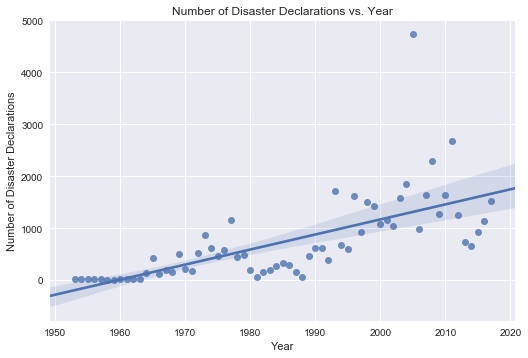

In [10]:
#Number of Total Disasters Declarations (sum of all disasters) VS year 
#FEMA disaster declarations VS Year (two line graphs on top of each other)

sns.set()

# Create scatterplot of dataframe
sns.lmplot("year", "Number of Disaster Declarations", aspect = 1.5, data= disaster_declaration, fit_reg=True) 

# Set title and labels
plt.title('Number of Disaster Declarations vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Disaster Declarations')

#Save as png and show graph
DisasterDeclarations = plt.gcf()
plt.savefig('DisasterDeclarations.png')
plt.show()


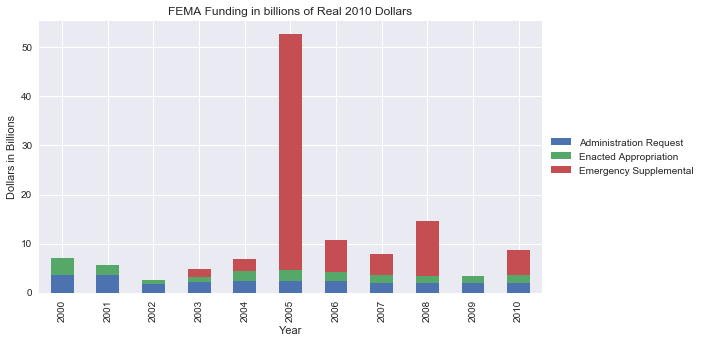

In [11]:
#FEMA budget VS Year | bar graph
plt.rcParams["figure.figsize"] = [9,5]
year_x = fema_funding['Year']
budget_g = fema_funding[['Administration Request', 'Enacted Appropriation', 'Emergency Supplemental ']].plot(x= year_x, kind='bar', stacked=True)
budget_g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set title and labels
plt.title('FEMA Funding in billions of Real 2010 Dollars')
plt.xlabel('Year')
plt.ylabel('Dollars in Billions')

#Save as png and show graph
femafunding = plt.gcf()
plt.savefig('FEMAFunding.png')
plt.show()

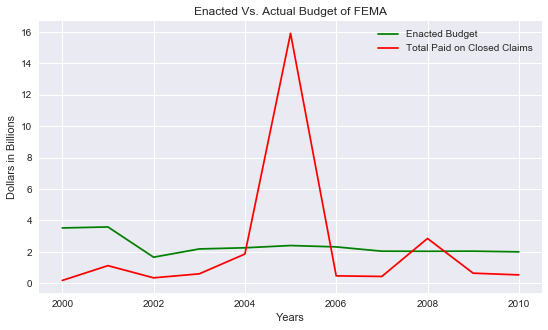

In [12]:
#Enacted appropriation + Administration request
femabudget = fema_funding['Administration Request'].tolist()

#Total paid on closed claims
paid_claims = nfip[(nfip_df["Year"] >= 2000) & (nfip["Year"] <= 2010)]
claims_budget = paid_claims['Total Paid on Closed Claims'].tolist()

#Enacted appropriation + Administration request AND Total paid on closed claims VS Year (2 line graph)
years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, femabudget, color="green", label="Enacted Budget")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, claims_budget, color="red", label="Total Paid on Closed Claims")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Enacted Vs. Actual Budget of FEMA")
plt.xlabel("Years")
plt.ylabel("Dollars in Billions")

# Print and save chart to the screen
Comparebudget = plt.gcf()
plt.savefig('CompareBudgetofFema.png')
plt.show()
